In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
#Reading the CSV dataset provided
df = pd.read_csv("Leads.csv", index_col = 'Prospect ID')

In [3]:
#understanding the data and the coloumns
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Getting information about the coloumns and the Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   flo

In [5]:
#getting the shape of the dataset - number of coloumns and rows
df.shape

(9240, 36)

In [6]:
#Null values present in each coloumn
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [7]:
df.duplicated().sum()

0

No Duplicate rows present.

In [9]:
# Handle missing values
num_clmn = df.select_dtypes(include=['int64', 'float64']).columns
cat_clmn = df.select_dtypes(include=['object']).columns

In [10]:
# Impute numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df[num_clmn] = numeric_imputer.fit_transform(df[num_clmn])

In [11]:
df.replace('Select', np.nan, inplace=True)

In [12]:
# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[cat_clmn] = cat_imputer.fit_transform(df[cat_clmn])

In [13]:
#Lets create dummy for the columns and drop the first column
df = pd.get_dummies(df, columns= cat_clmn, drop_first=True)

In [14]:
#checking the sum of null values again after imputing the values
df.isnull().sum()

Lead Number                                           0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 195, dtype: int64

In [15]:
#Lets create a new metrix 'Total_Activity' that will give us the approx. value for the activities done by the lead on the website 
#and then we can drop the columns from which it is extracted to decrease the redundencies
df['Total_Activity'] = df['TotalVisits'] * df['Total Time Spent on Website'] * df['Page Views Per Visit']

In [16]:
df.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis = 1,inplace = True)

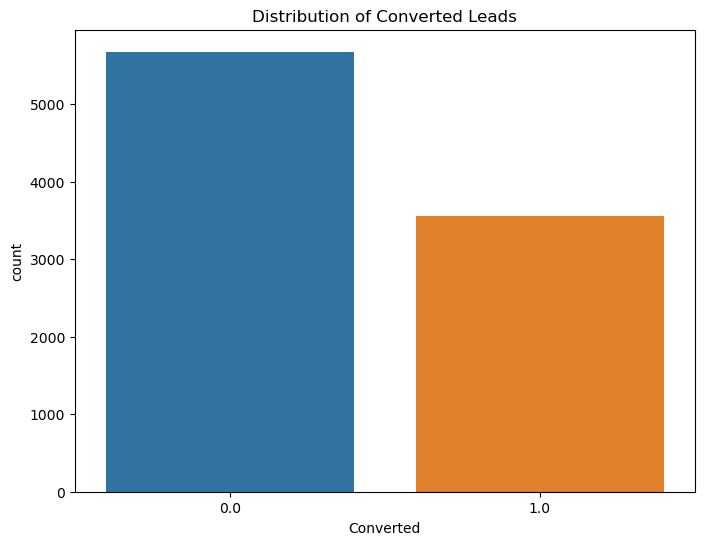

In [17]:
# Visualizing the distribution of the target variable 'Converted'
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted Leads')
plt.show()

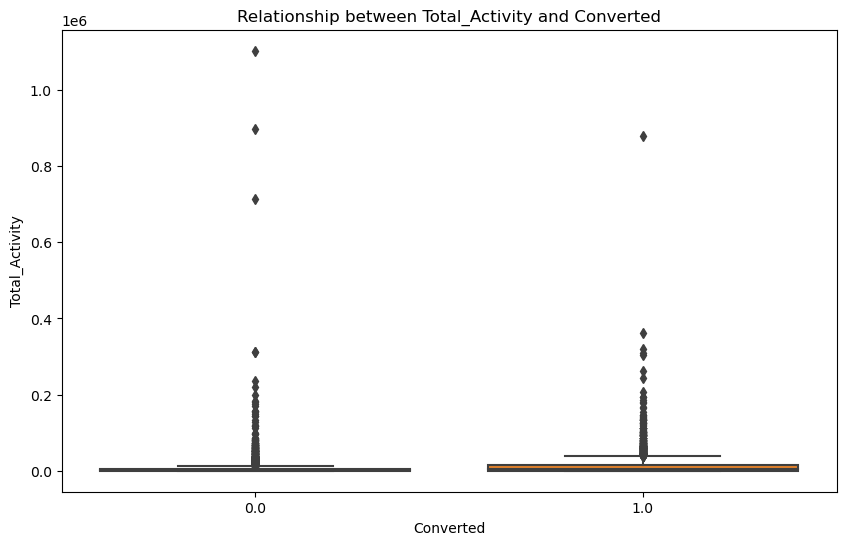

In [18]:
# Visualizing the relationship between Total_Activity and Converted
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='Total_Activity', data=df)
plt.title('Relationship between Total_Activity and Converted')
plt.show()

In [19]:
#Identifying and removing the outliers present in the data
Q1 = df['Total_Activity'].quantile(0.25)
Q3 = df['Total_Activity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total_Activity'] < lb) | (df['Total_Activity'] > ub)]

# Remove outliers
df_no_outliers = df[(df['Total_Activity'] >= lb) & (df['Total_Activity'] <= ub)]

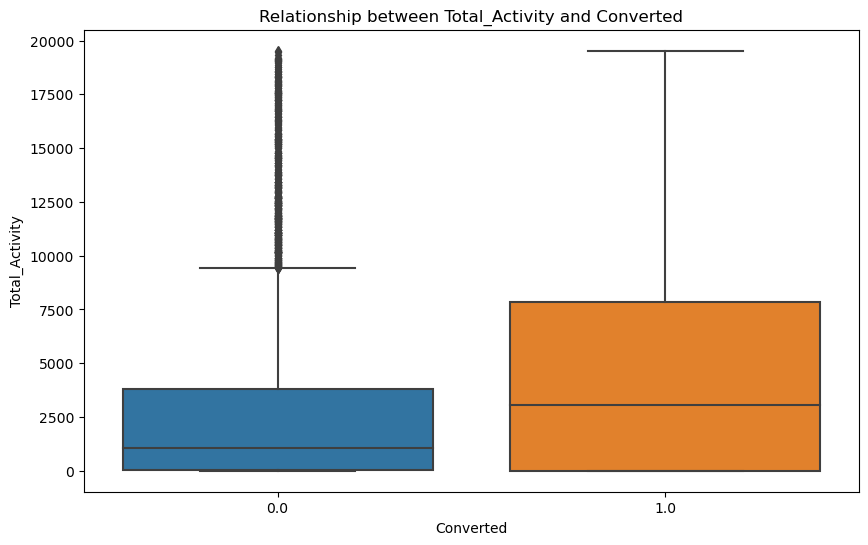

In [20]:
# Visualizing the relationship between Total_Activity and Converted after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='Total_Activity', data=df_no_outliers)
plt.title('Relationship between Total_Activity and Converted')
plt.show()

In [21]:
#Assigning the X and Y variable
X = df_no_outliers.drop(columns=['Converted'])
y = df_no_outliers['Converted']

In [22]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [23]:
# Separating numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [24]:
# Create a correlation matrix
corr_matrix = df_no_outliers[[ 'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Total_Activity']].corr()

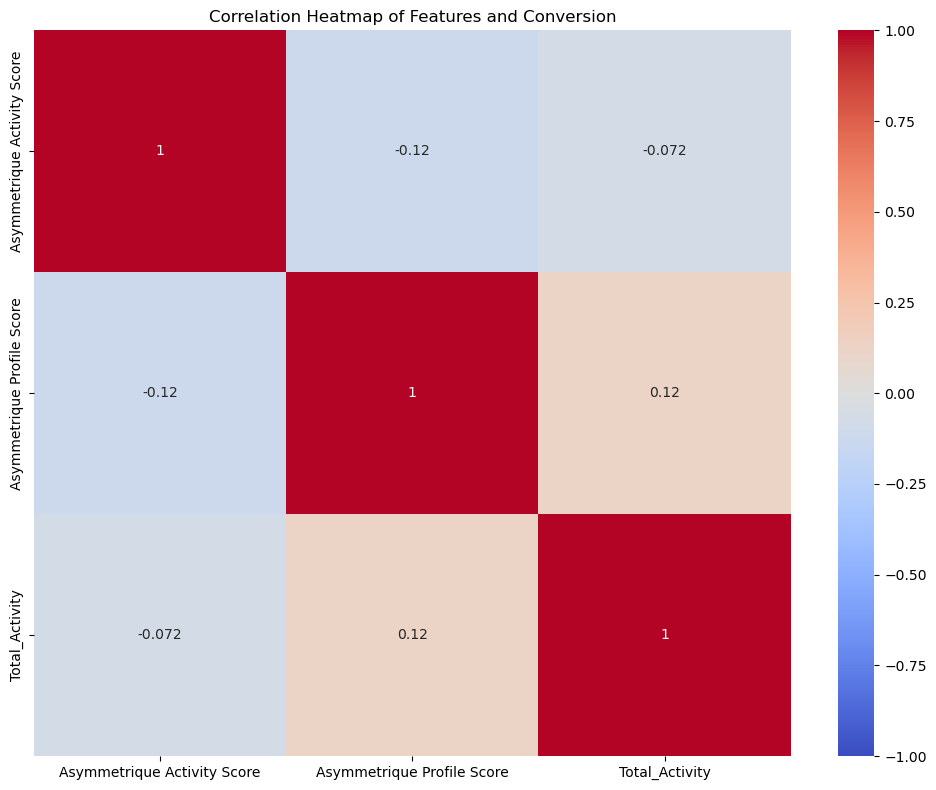

In [25]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Features and Conversion')
plt.tight_layout()
plt.show()

non is having the correlation more than 0.8 or less than -0.8 so no need to drop any of these columns.

In [26]:
#Applying LogisticRegression on the data set
model1 = LogisticRegression()

In [27]:
#Fitting the test and train data 
model1 = model1.fit(X_train, y_train)
l1 = model1.predict_proba(X_test)

In [28]:
#Probability of Leads getting converted in percentage
#Adding the probability of getting converted in the dataset 
fl=[]
for i in l1:
    print(i[1]*100)
    df_no_outliers['Lead_conversion_probab']=i[1]*100

27.601162445846896
45.91129873176398
32.56247886897231
26.032339345889138
28.05949924691305
38.107361396191074
42.09432979203737
33.5914330760337
37.48934914538671
27.739833306453964
29.120032491087517
38.36449646510419
26.908870084256503
33.053394730373924
28.306455527311087
25.587468848934027
35.4319529683585
58.97294388692141
27.926722825449403
36.87297285711767
29.556489688496857
32.12156961877422
30.55607886229106
31.689815667987148
40.129293431470984
31.744972758953416
62.298881916180946
25.951312600610795
55.5641212079249
51.196097955078415
25.66125472868069
27.219491840642025
37.430392639210964
45.02858068485755
26.631086891570575
33.50308168904568
27.995155568038825
28.671088240778115
26.56618218971978
27.50839169368524
55.83650527045849
35.71338171812546
39.25351391933708
26.56137069387962
30.085078052695952
31.140092925446837
28.552130410488353
30.41975765445765
43.31211373824937
27.892072496395475
28.380893083929674
30.507223746971047
26.833597530026985
28.547176777881738
3

In [30]:
#printing the Lead number and Lead conversion Probablity from the dataset
print(df_no_outliers[['Lead Number','Lead_conversion_probab']])

                                      Lead Number  Lead_conversion_probab
Prospect ID                                                              
7927b2df-8bba-4d29-b9a2-b6e0beafe620     660737.0                43.99187
2a272436-5132-4136-86fa-dcc88c88f482     660728.0                43.99187
8cc8c611-a219-4f35-ad23-fdfd2656bd8a     660727.0                43.99187
0cc2df48-7cf4-4e39-9de9-19797f9b38cc     660719.0                43.99187
3256f628-e534-4826-9d63-4a8b88782852     660681.0                43.99187
...                                           ...                     ...
2d0109e9-dfb2-4664-83de-c2ea75ec7516     579642.0                43.99187
c0b25922-511f-4c56-852e-ced210a45447     579615.0                43.99187
82a7005b-7196-4d56-95ce-a79f937a158d     579546.0                43.99187
aac550fe-a586-452d-8d3c-f1b62c94e02c     579545.0                43.99187
5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9     579538.0                43.99187

[8173 rows x 2 columns]


In [31]:
l2 = model1.predict(X_test)

In [36]:
#Adding the coloumn for clrification of leads which have the probablity of getting conveted is more than 50% as 1 and less than that as 0
for i in l2:
    print(int(i))
    df_no_outliers['Lead_will_convert'] = int(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0


In [37]:
#printing the Lead number and Lead conversion Probablity and if the lead will be converted or not from the dataset
print(df_no_outliers[['Lead Number','Lead_conversion_probab','Lead_will_convert']])

                                      Lead Number  Lead_conversion_probab  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620     660737.0                43.99187   
2a272436-5132-4136-86fa-dcc88c88f482     660728.0                43.99187   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a     660727.0                43.99187   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc     660719.0                43.99187   
3256f628-e534-4826-9d63-4a8b88782852     660681.0                43.99187   
...                                           ...                     ...   
2d0109e9-dfb2-4664-83de-c2ea75ec7516     579642.0                43.99187   
c0b25922-511f-4c56-852e-ced210a45447     579615.0                43.99187   
82a7005b-7196-4d56-95ce-a79f937a158d     579546.0                43.99187   
aac550fe-a586-452d-8d3c-f1b62c94e02c     579545.0                43.99187   
5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9     579538.0                43.99187   

# Finding the answers to the questions in the word file

In [38]:
correlation_matrix = df_no_outliers.corr()

In [42]:
correlation_matrix

,Lead Number,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Total_Activity,Lead_conversion_probab,Lead_will_convert
Lead Number,1.000000,0.029622,-0.049569,-0.106643,-0.080968,0.032741,0.112577,0.008370,-0.151574,0.110146,...,-0.036020,-0.002927,0.006441,-0.168771,0.004972,-0.001429,0.001702,0.035627,NaN,NaN
Converted,0.029622,1.000000,0.098335,0.146793,-0.106329,0.374006,-0.019228,0.015155,-0.088828,-0.019228,...,-0.075619,-0.041455,0.015155,0.357213,0.040749,-0.021738,-0.008075,0.217643,NaN,NaN
Asymmetrique Activity Score,-0.049569,0.098335,1.000000,-0.124355,-0.194565,0.016089,-0.041702,-0.001564,-0.099821,-0.041702,...,0.122666,0.002437,-0.001564,-0.042266,0.021757,-0.023333,-0.001564,-0.072172,NaN,NaN
Asymmetrique Profile Score,-0.106643,0.146793,-0.124355,1.000000,0.363640,0.156510,-0.120004,-0.026566,0.177949,-0.118862,...,-0.054670,0.016669,-0.001238,0.035435,0.003030,0.002859,-0.001238,0.119641,NaN,NaN
Lead Origin_Landing Page Submission,-0.080968,-0.106329,-0.194565,0.363640,1.000000,-0.304899,-0.081240,-0.010918,0.578682,-0.078247,...,-0.116748,0.048263,-0.010918,0.037588,-0.003421,0.011439,-0.010918,0.336382,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Unsubscribed,-0.001429,-0.021738,-0.023333,0.002859,0.011439,-0.009230,-0.005772,-0.000776,-0.000123,-0.005772,...,-0.010343,-0.012534,-0.000776,-0.037563,-0.004112,1.000000,-0.000776,0.005196,NaN,NaN
Last Notable Activity_View in browser link Clicked,0.001702,-0.008075,-0.001564,-0.001238,-0.010918,-0.003417,-0.000911,-0.000122,-0.006826,-0.000911,...,-0.001632,-0.001977,-0.000122,-0.005925,-0.000649,-0.000776,1.000000,-0.003727,NaN,NaN
Total_Activity,0.035627,0.217643,-0.072172,0.119641,0.336382,-0.154944,-0.034521,0.023740,0.087592,-0.032497,...,-0.045713,0.066360,-0.008307,0.098638,0.022045,0.005196,-0.003727,1.000000,NaN,NaN
Lead_conversion_probab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
correlation_with_target = correlation_matrix['Converted'].abs().sort_values(ascending=False)

In [40]:
top_three_variables = correlation_with_target.index[1:4]

In [41]:
top_three_variables

Index(['Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead', 'Lead Origin_Lead Add Form'],
      dtype='object')

Answer to the first question is :
1) Tags_Will revert after reading the email
2) Lead Profile_Potential Lead
3) Lead Origin_Lead Add Form

In [43]:
coefficients = model1.coef_[0]

In [44]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

In [45]:
# Get absolute values of coefficients to identify the strongest predictors
feature_importances['AbsoluteCoefficient'] = feature_importances['Coefficient'].abs()

In [46]:
# Sort by absolute coefficient
feature_importances = feature_importances.sort_values(by='AbsoluteCoefficient', ascending=False)

In [47]:
# Get the top three variables
top_three_variables2 = feature_importances.head(3)

In [48]:
top_three_variables2

,Feature,Coefficient,AbsoluteCoefficient
191,Total_Activity,9.863712e-05,9.863712e-05
0,Lead Number,-1.623225e-06,1.623225e-06
146,Tags_Will revert after reading the email,2.462713e-08,2.462713e-08


Answer to the second question is :
1. Total_Activity
2. Lead Number
3. Tags_Will revert after reading the email
